# Netflix EDA
### Dataset: https://www.kaggle.com/datasets/shivamb/netflix-shows

In [21]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "svg"
import kaleido

In [3]:
data = pd.read_csv('D:/netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [5]:
# Changing dtype for 'date_added' from object to datetime
data = pd.read_csv('D:/netflix_titles.csv')
data["date_added"] = pd.to_datetime(data["date_added"].str.strip(), format='%B %d, %Y')

In [6]:
data.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

## Anayzing date

<AxesSubplot:>

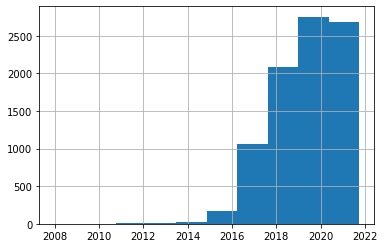

In [7]:
# Histogram of adding date and release year of movies and TV shows on Netflix in Matplotlib
data["date_added"].hist()

<AxesSubplot:>

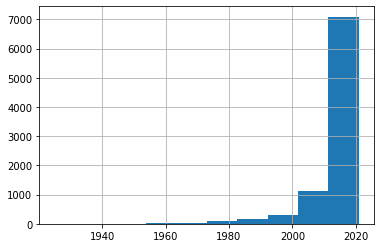

In [8]:
data["release_year"].hist()

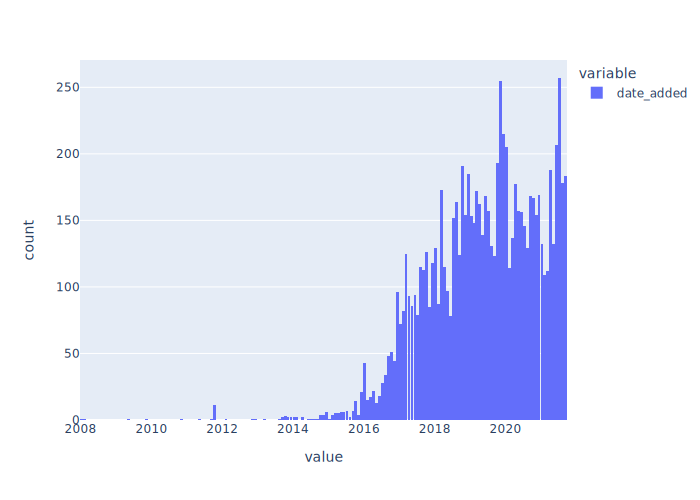

In [10]:
# Version using Plotly
f = px.histogram(data["date_added"]).show('svg')

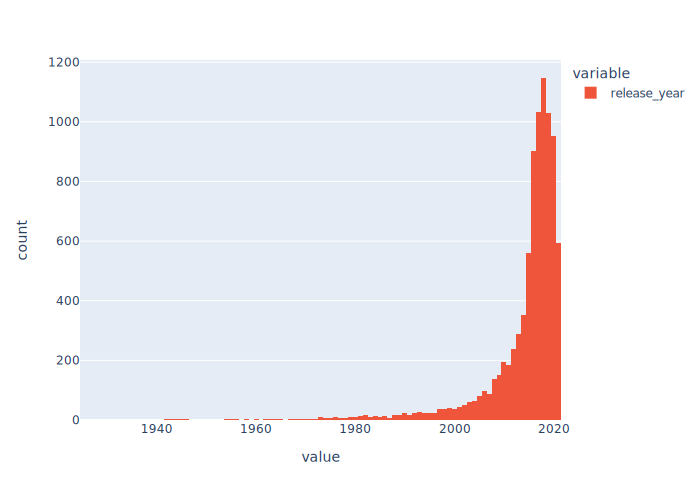

In [11]:
px.histogram(data["release_year"], color_discrete_map={0:'red'}).show('svg')

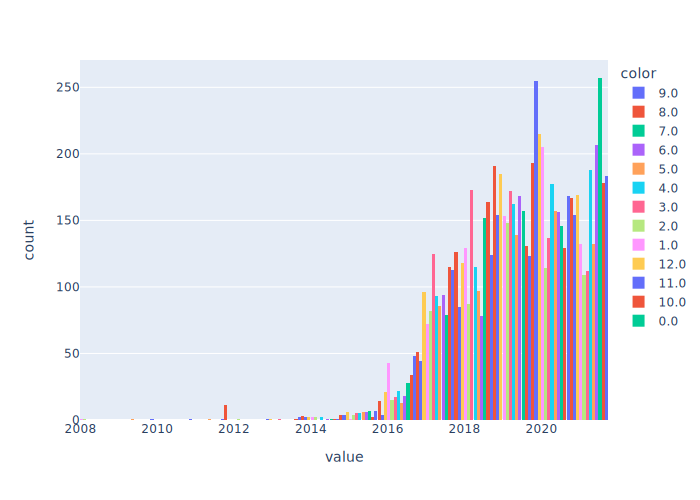

In [13]:
# Extracting months
# Filling NaN values with 0
data["month_added"] = data["date_added"].dt.month.fillna(0)
px.histogram(data["date_added"], color=data["month_added"]).show('svg')

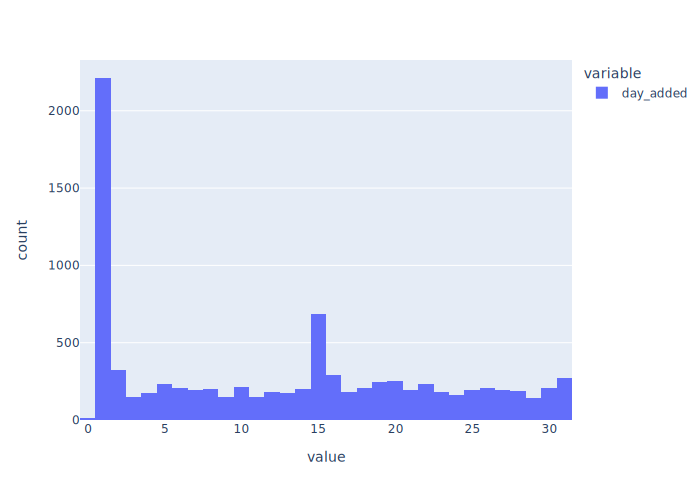

In [14]:
data["day_added"] = data["date_added"].dt.day.fillna(0)
px.histogram(data["day_added"]).show('svg')
# it looks like Netflix is usually replenishes their catalog on first day of the month 

## String features analysis

In [15]:
data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

<AxesSubplot:>

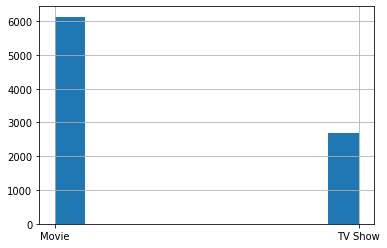

In [16]:
data['type'].hist() # As we can see here, there are almost twice as many movies in the catalog as there are TV shows

In [24]:
data_country = pd.DataFrame(data=data['country'].unique())
data_country.head(30)
# There are a lot of movies where 'country' column was specified as a list of several countries
# which makes one country appear multiple times even after using .unique() function
# Let's fix that

,0
0,United States
1,South Africa
2,NaN
3,India
4,"United States, Ghana, Burkina Faso, United Kin..."
5,United Kingdom
6,"Germany, Czech Republic"
7,Mexico
8,Turkey
9,Australia


In [19]:
countries = data.copy()
countries = pd.concat([countries, data['country'].str.split(",", expand=True)], axis=1)
countries = countries.melt(id_vars=['type', 'title'], value_vars=range(12), value_name='Country')
countries = countries[countries["Country"].notna()]
countries["Country"] = countries["Country"].str.strip()
countries

,type,title,variable,Country
0,Movie,Dick Johnson Is Dead,0,United States
1,TV Show,Blood & Water,0,South Africa
4,TV Show,Kota Factory,0,India
7,Movie,Sankofa,0,United States
8,TV Show,The Great British Baking Show,0,United Kingdom
...,...,...,...,...
78859,Movie,The Look of Silence,8,Germany
85496,Movie,Barbecue,9,Sweden
87666,Movie,The Look of Silence,9,Netherlands
94303,Movie,Barbecue,10,United States


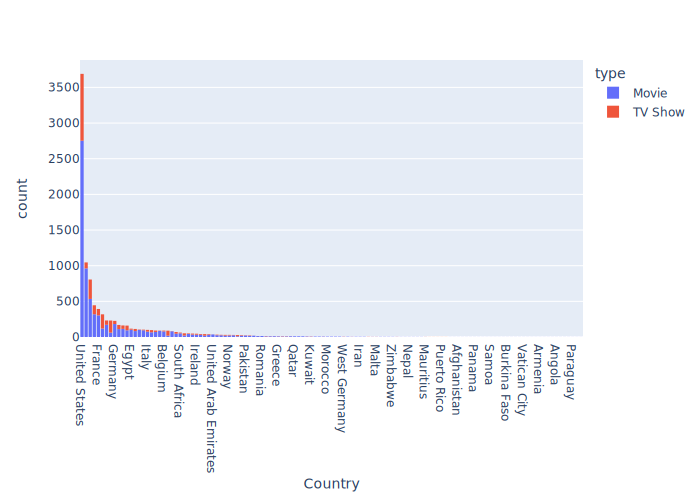

In [20]:
px.histogram(countries, 'Country', color='type').update_xaxes(categoryorder='total descending').show('svg')